# Task 1 - Prediction using Supervised Machine Learning
Predicting the optimum number of clusters from the given 'Iris' dataset using some of the basics of K-Means Clustering.

### GRIPAUGUST'21

### Author: Sayantika Chakravarty


## Step 1 - Importing the standard ML Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## Step 2 - Reading data from file saved

In [19]:
# Load the iris dataset
iris = pd.read_csv('Iris.csv')
iris.drop('Id',axis=1,inplace=True)  #Id column is not a real feature of the flowers, so we drop it
iris.head()  #See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3 - We find the unique features in species columns

In [20]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Thus the three unique levels for species in Iris dataset are Iris-setosa, Iris-versicolor, Iris-virginica.

## Step 4 - Adjusting the dataset for Unsupervised Learning

I will simply not use labels column on my "new" Dataset.

In [37]:
features = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

From now on we don't know the real labels or amount of labels anymore.

## Step 5 -  Implementing the K means Clustering to find the optimum number of clusters

Scikit-Learn implementation is used for K Means Clustering

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99)

Why 99? Beacause we dont't know the right amount of Labels. Don't worry. There is a solution to it.

#### We will use ELBOW RULE , which is basically looking for a plot line that respectively has a slope nearest to 90degrees compared to y axis and be smallest possible. [ yes, looks like an elbow ]

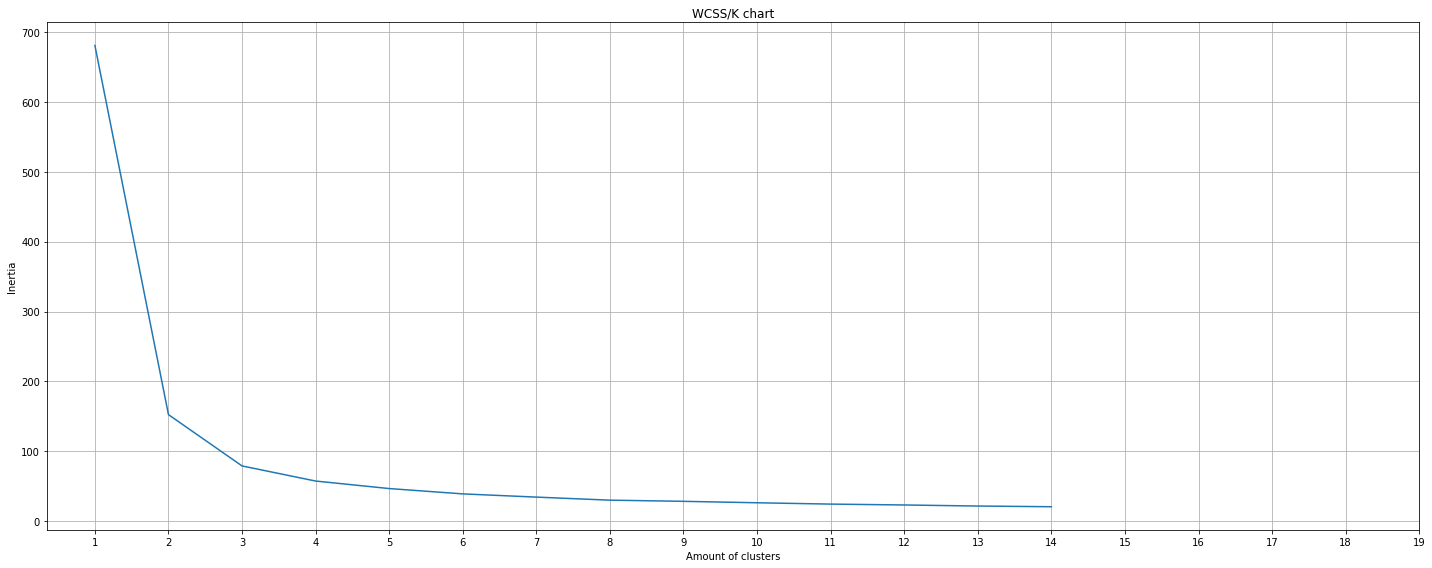

In [34]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(20,8))
plt.title('WCSS/K chart')
plt.plot(range(1, 15), wcss)
plt.grid(True)
plt.xlabel('Amount of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

#### 3 seems to be the best value for clusters(By Elbow Method). The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

## Step 6 - With visual representation double checking that K = 3

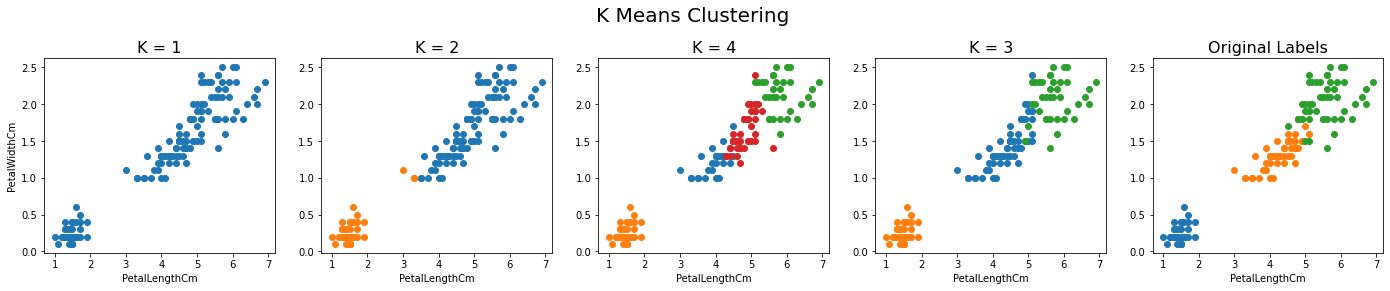

In [38]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)  # Plot for K=1
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)  #Plot for K=2
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)   #Plot for K=3
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)   #Plot for K=4
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)   #Plot for Original Labels
plt.xlabel("PetalLengthCm")
plt.scatter(iris.PetalLengthCm[iris.Species == "Iris-setosa"],iris.PetalWidthCm[iris.Species == "Iris-setosa"])
plt.scatter(iris.PetalLengthCm[iris.Species == "Iris-versicolor"],iris.PetalWidthCm[iris.Species == "Iris-versicolor"])
plt.scatter(iris.PetalLengthCm[iris.Species == "Iris-virginica"],iris.PetalWidthCm[iris.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

#### Kmeans visibly did an amazing job with 3 clusters. Except few data points we can say prediction is identical to the original with labels. Which shows that our ELBOW chart was right.
## Therefore the optimum number of clusters are K=3.